## Program 1

#### Best First Search

In [1]:
from collections import deque

def best_first_search_deque(graph, start, goal, heuristic):
    # Priority queue for exploring nodes based on heuristic values
    queue = deque([(start, heuristic[start])])
    visited = set()
    parent = {start: None}
    cost = {start: 0}

    while queue:
        # Sort queue based on heuristic values to simulate priority queue
        queue = deque(sorted(list(queue), key=lambda x: x[1]))
        current_node, current_heuristic = queue.popleft()

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            break

        for neighbor, edge_cost in graph[current_node]:
            if neighbor not in visited:
                queue.append((neighbor, heuristic[neighbor]))
                parent[neighbor] = current_node
                cost[neighbor] = cost[current_node] + edge_cost

    path = []
    node = goal
    total_cost = cost.get(goal, 0)
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()

    return path, total_cost

# Example graph with manually assigned costs
graph = {
    'A': [('B', 1), ('C', 2)],
    'B': [('D', 3), ('E', 4)],
    'C': [('F', 5), ('G', 6)],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}

# Example heuristic values (assumed for demonstration)
heuristic = {
    'A': 6,
    'B': 4,
    'C': 4,
    'D': 0,
    'E': 2,
    'F': 3,
    'G': 1
}

start = 'A'
goal = 'D'

path, total_cost = best_first_search_deque(graph, start, goal, heuristic)
print("Best First Search Path:", path)
print("Total Cost:", total_cost)

Best First Search Path: ['A', 'B', 'D']
Total Cost: 4


#### 3D surface plot

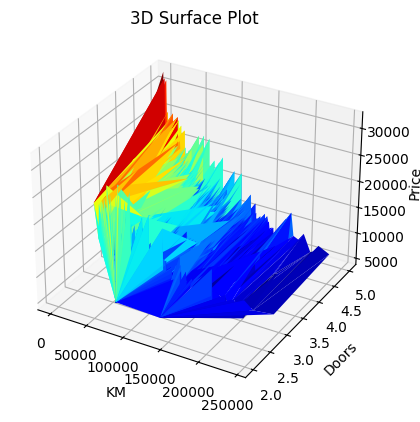

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('ToyotaCorolla.csv')
x = dataset['KM']
y = dataset['Doors']
z = dataset['Price']

ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap="jet")
ax.set_title("3D Surface Plot")
ax.set_xlabel("KM")
ax.set_ylabel("Doors")
ax.set_zlabel("Price")

plt.show()

## Program 2

#### A star

In [4]:
from collections import deque

def a_star_search_deque(graph, start, goal, heuristic, cost):
    # Queue for exploring nodes
    queue = deque([(start, 0 + heuristic[start])])
    visited = set()
    g_cost = {start: 0}
    parent = {start: None}

    while queue:
        # Sort queue based on f-cost to simulate priority queue
        queue = deque(sorted(list(queue), key=lambda x: x[1]))
        current_node, current_f_cost = queue.popleft()

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            break

        for neighbor in graph[current_node]:
            new_cost = g_cost[current_node] + cost[(current_node, neighbor)]
            if neighbor not in g_cost or new_cost < g_cost[neighbor]:
                g_cost[neighbor] = new_cost
                f_cost = new_cost + heuristic[neighbor]
                queue.append((neighbor, f_cost))
                parent[neighbor] = current_node

    path = []
    node = goal
    total_cost = g_cost.get(goal, 0)
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()

    return path, total_cost

# Example graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}

# Example heuristic values
heuristic = {
    'A': 6,
    'B': 4,
    'C': 4,
    'D': 0,
    'E': 2,
    'F': 3,
    'G': 1
}

# Example costs between nodes
cost = {
    ('A', 'B'): 1,
    ('A', 'C'): 1,
    ('B', 'D'): 1,
    ('B', 'E'): 3,
    ('C', 'F'): 5,
    ('C', 'G'): 2
}

start = 'A'
goal = 'D'

path, total_cost = a_star_search_deque(graph, start, goal, heuristic, cost)
print("A* Search Path:", path)
print("Total Cost:", total_cost)

A* Search Path: ['A', 'B', 'D']
Total Cost: 2


#### Contour Plot

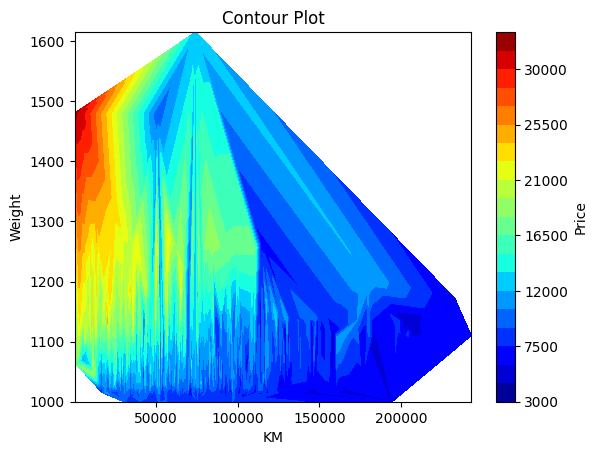

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('ToyotaCorolla.csv')
x = dataset['KM']
y = dataset['Weight']
z = dataset['Price']

plt.tricontourf(x, y, z, levels=20, cmap='jet')
plt.colorbar(label='Price')
plt.xlabel('KM')
plt.ylabel('Weight')
plt.title('Contour Plot')
plt.show()

## Program 3

#### Minmax

In [6]:
def minmax(depth, nodeIndex, maximizingPlayer, values, alpha, beta, path):
    if depth == 3:
        return values[nodeIndex], path + [nodeIndex]
    
    if maximizingPlayer:
        best = float('-inf')
        best_path = []
        for i in range(2):
            val, new_path = minmax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta, path + [nodeIndex])
            if val > best:
                best = val
                best_path = new_path
        return best, best_path
    else:
        best = float('inf')
        best_path = []
        for i in range(2):
            val, new_path = minmax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta, path + [nodeIndex])
            if val < best:
                best = val
                best_path = new_path
        return best, best_path

# Example tree with depth 3 and 8 terminal nodes
values = [3, 5, 2, 9, 12, 5, 23, 23]

# Start the Min-Max algorithm
optimal_value, optimal_path = minmax(0, 0, True, values, float('-inf'), float('inf'), [])
print("The optimal value is:", optimal_value)
print("The path taken is:", optimal_path)

The optimal value is: 12
The path taken is: [0, 1, 2, 4]


#### Heatmap

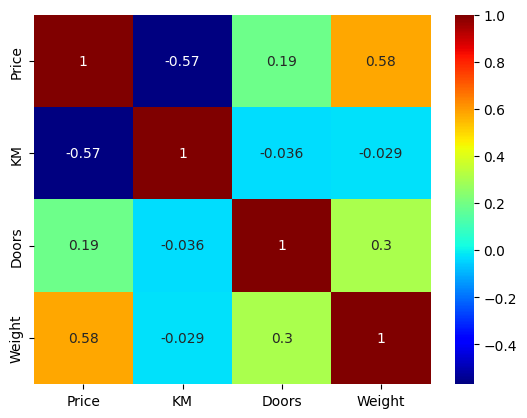

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("ToyotaCorolla.csv")

sns.heatmap(data[["Price","KM","Doors", "Weight"]].corr(), annot = True, cmap='jet')
plt.show()

## Program 4

#### AlphaBeta

In [9]:
def alphabeta(depth, nodeIndex, maximizingPlayer, values, alpha, beta, path):
    if depth == 3:
        return values[nodeIndex], path + [nodeIndex]

    if maximizingPlayer:
        best = float('-inf')
        best_path = []
        for i in range(2):
            val, new_path = alphabeta(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta, path + [nodeIndex])
            if val > best:
                best = val
                best_path = new_path
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best, best_path
    else:
        best = float('inf')
        best_path = []
        for i in range(2):
            val, new_path = alphabeta(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta, path + [nodeIndex])
            if val < best:
                best = val
                best_path = new_path
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best, best_path

# Example tree with depth 3 and 8 terminal nodes
values = [3, 5, 2, 9, 12, 5, 23, 23]

# Start the Alpha-Beta Pruning algorithm
optimal_value, optimal_path = alphabeta(0, 0, True, values, float('-inf'), float('inf'), [])
print("The optimal value is:", optimal_value)
print("The path taken is:", optimal_path)

The optimal value is: 12
The path taken is: [0, 1, 2, 4]


#### Boxplot

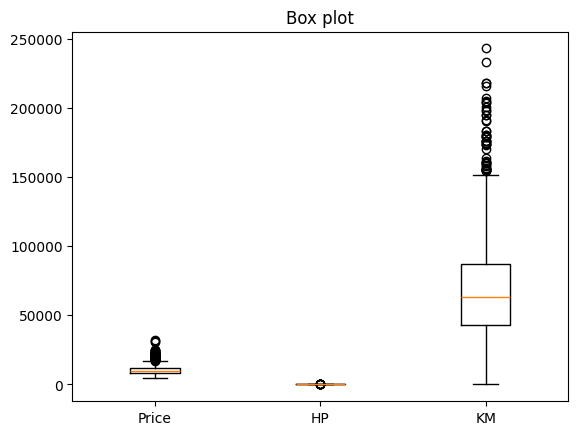

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('ToyotaCorolla.csv')

plt.boxplot([data["Price"],data["HP"],data["KM"]])
plt.xticks([1,2,3],["Price","HP","KM"])
plt.title("Box plot")

plt.show()

## Program 5

#### Naive Bayes

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("Titanic-Dataset.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [14]:
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [17]:
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [18]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [19]:
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

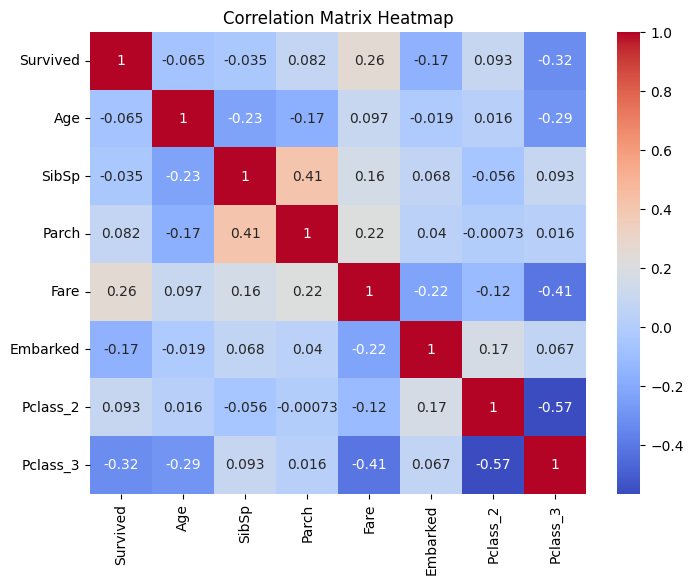

In [20]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [25]:
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[78 27]
 [35 39]]
Accuracy: 0.6536312849162011


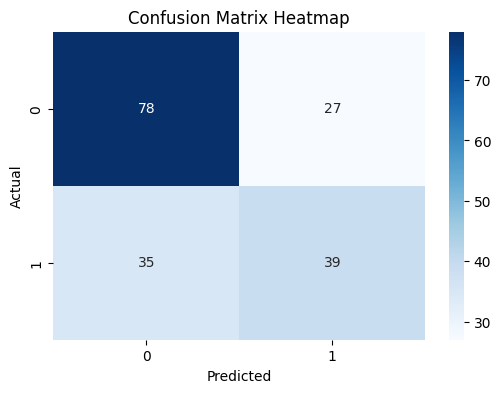

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Program 6

#### KNN

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('glass.csv')

In [29]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

In [30]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df[df.columns])

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Type', axis=1))

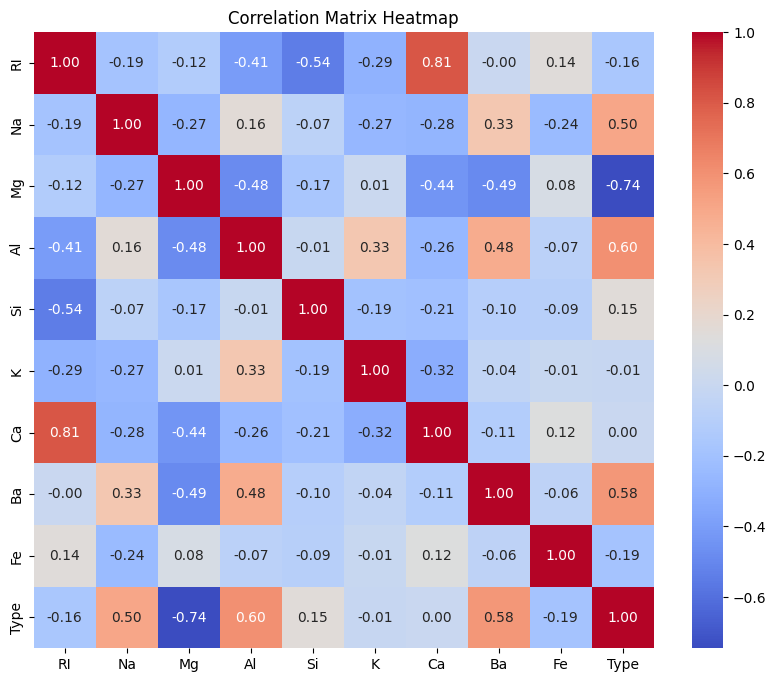

In [33]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
y = df['Type'].values
X = X_scaled

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
def custom_euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def custom_manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [37]:
k = 3  # Number of neighbors
clf_custom_euclidean = KNeighborsClassifier(n_neighbors=k, metric=custom_euclidean_distance)
clf_custom_manhattan = KNeighborsClassifier(n_neighbors=k, metric=custom_manhattan_distance)

In [38]:
clf_custom_euclidean.fit(X_train, y_train)
clf_custom_manhattan.fit(X_train, y_train)

KNeighborsClassifier(metric=<function custom_manhattan_distance at 0x00000291C5A0F100>,
                     n_neighbors=3)

In [39]:
predictions_custom_euclidean = clf_custom_euclidean.predict(X_test)
predictions_custom_manhattan = clf_custom_manhattan.predict(X_test)

In [40]:
accuracy_custom_euclidean = accuracy_score(y_test, predictions_custom_euclidean)
accuracy_custom_manhattan = accuracy_score(y_test, predictions_custom_manhattan)
print("Accuracy with Euclidean Distance:", accuracy_custom_euclidean)
print("Accuracy with Manhattan Distance:", accuracy_custom_manhattan)

Accuracy with Euclidean Distance: 0.6615384615384615
Accuracy with Manhattan Distance: 0.6923076923076923


In [41]:
cm_custom_euclidean = confusion_matrix(y_test, predictions_custom_euclidean)
cm_custom_manhattan = confusion_matrix(y_test, predictions_custom_manhattan)

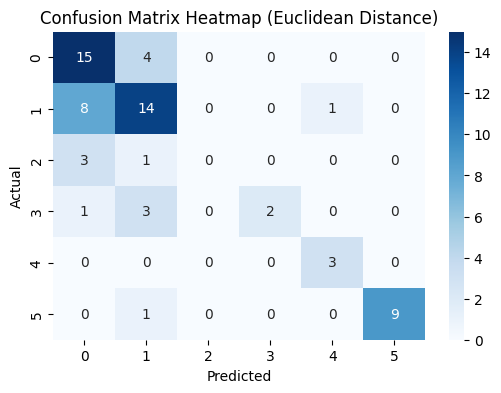

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_euclidean, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Euclidean Distance)')
plt.show()

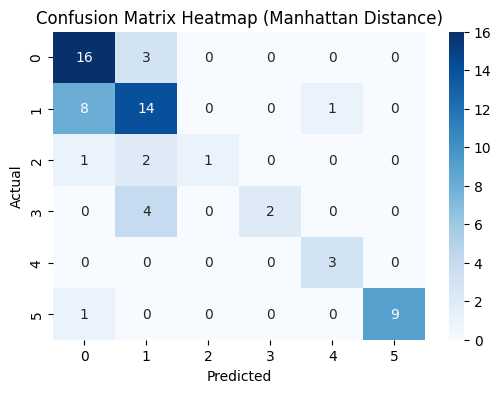

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_manhattan, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Manhattan Distance)')
plt.show()

## Program 7

#### Decision Tree

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [45]:
file_path = "weather_forecast.csv"
df = pd.read_csv(file_path)

In [46]:
print(df.head())

    Outlook Temperature Humidity   Windy Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes


In [47]:
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(df.drop('Play', axis=1)).toarray()
y = df['Play']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [49]:
clf_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [50]:
clf_id3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

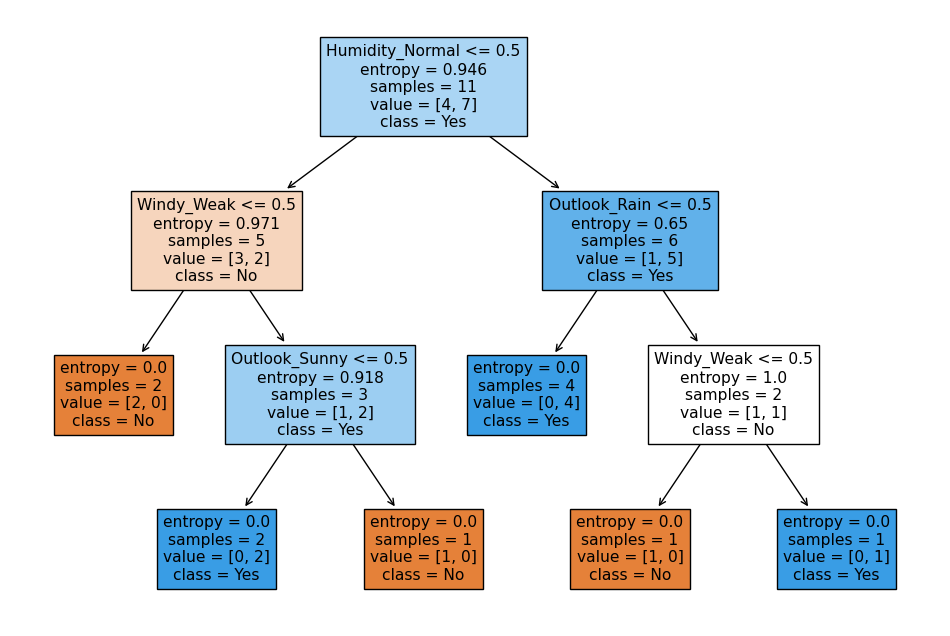

In [51]:
plt.figure(figsize=(12, 8))
plot_tree(clf_id3, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

In [52]:
y_pred_id3 = clf_id3.predict(X_test)

In [53]:
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
report_id3 = classification_report(y_test, y_pred_id3)

In [54]:
print("ID3 Algorithm Results:")
print(f"Accuracy: {accuracy_id3}")
print(f"Classification Report:\n{report_id3}")

ID3 Algorithm Results:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [55]:
cv_scores_id3 = cross_val_score(clf_id3, X_encoded, y, cv=5)
print("Cross-Validation Scores (ID3):", cv_scores_id3)
print("Mean CV Accuracy (ID3):", cv_scores_id3.mean())

Cross-Validation Scores (ID3): [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy (ID3): 0.7333333333333333


In [56]:
clf_cart = DecisionTreeClassifier(criterion='gini', random_state=42)

In [57]:
clf_cart.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

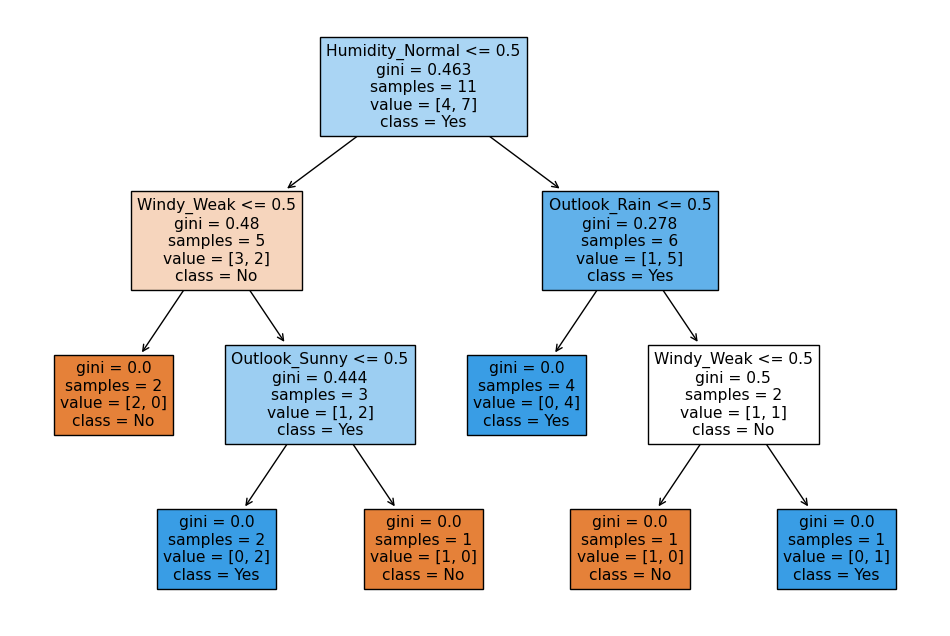

In [58]:
plt.figure(figsize=(12, 8))
plot_tree(clf_cart, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

In [59]:
y_pred_cart = clf_cart.predict(X_test)

In [60]:
accuracy_cart = accuracy_score(y_test, y_pred_cart)
report_cart = classification_report(y_test, y_pred_cart)

In [61]:
print("CART Algorithm Results:")
print(f"Accuracy: {accuracy_cart}")
print(f"Classification Report:\n{report_cart}")

CART Algorithm Results:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [62]:
cv_scores_cart = cross_val_score(clf_cart, X_encoded, y, cv=5)
print("Cross-Validation Scores (CART):", cv_scores_cart)
print("Mean CV Accuracy (CART):", cv_scores_cart.mean())

Cross-Validation Scores (CART): [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy (CART): 0.7333333333333333


## Program 8

#### KMeans

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [64]:
def kmeans(X, K, max_iters=100):
    # Step 1: Initialize centroids with the first K samples
    centroids = X[:K]
    
    # Step 1: Assign the remaining n-K samples to the nearest centroid and update centroids
    for i in range(K, len(X)):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        centroids[nearest_centroid] = (centroids[nearest_centroid] + X[i]) / 2
    
    labels = np.zeros(X.shape[0])
    
    # Step 2: Assign each sample to the nearest centroid without updating centroids
    for _ in range(max_iters):
        for i in range(len(X)):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            nearest_centroid = np.argmin(distances)
            labels[i] = nearest_centroid
    
    return labels, centroids

In [65]:
iris = load_iris()
X = iris.data
y = iris.target

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

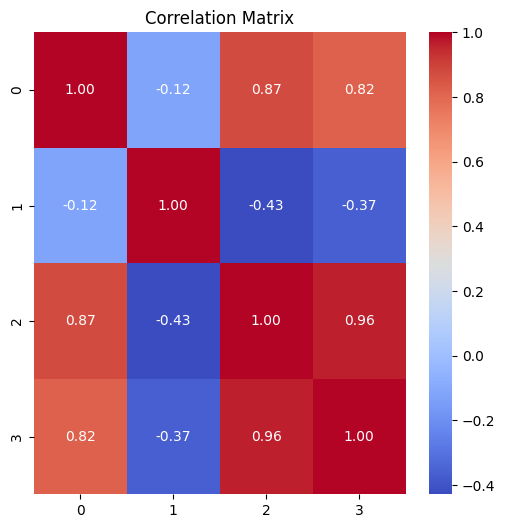

In [67]:
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [68]:
K = 3
labels, centroids = kmeans(X_scaled, K)
print("Labels:", labels)
print("Centroids:", centroids)

Labels: [0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]
Centroids: [[ 0.684312    0.39488866  0.9094604   1.36632955]
 [ 0.2127703  -0.5201684   0.75084178  0.83154966]
 [-1.18387052  0.57041411 -1.3304718  -1.24593938]]


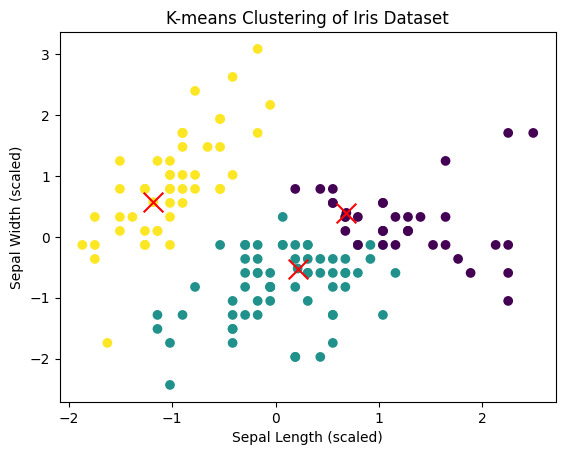

In [69]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

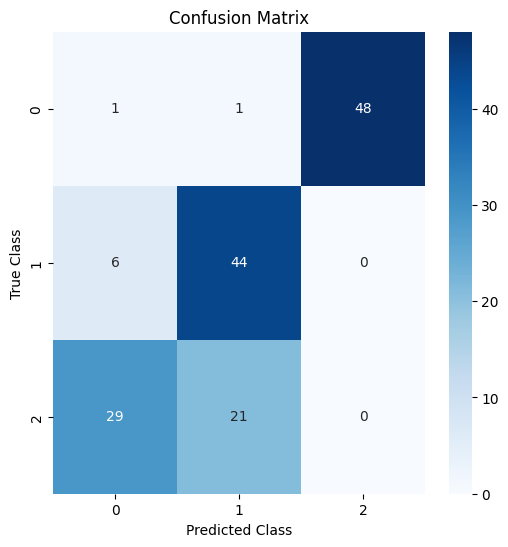

In [70]:
conf_matrix = confusion_matrix(y, labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

## Program 9

#### Agglomerative Clustering

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [72]:
iris = load_iris()
data = iris.data[:6]

In [73]:
def proximity_matrix(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
            proximity_matrix[j, i] = proximity_matrix[i, j]
    return proximity_matrix

In [74]:
def plot_dendrogram(data, method):
    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram - {method} linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

In [75]:
def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

In [76]:
def plot_correlation_matrix(data):
    correlation_matrix = np.corrcoef(data.T)
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

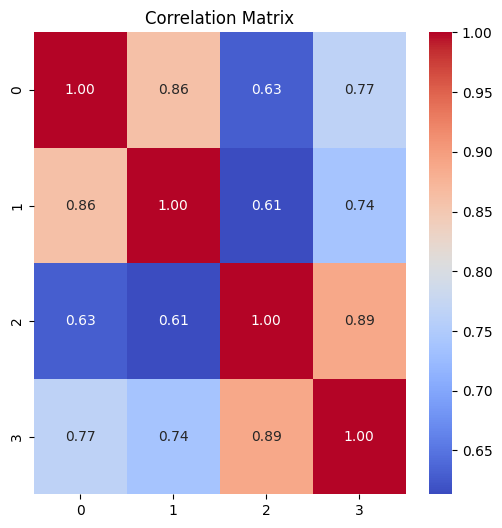

In [77]:
plot_correlation_matrix(data)

In [78]:
print("Proximity matrix:")
print(proximity_matrix(data))

Proximity matrix:
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


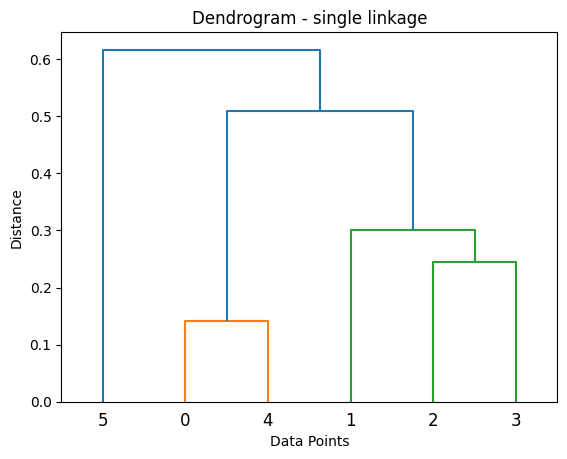

In [79]:
plot_dendrogram(data, 'single')

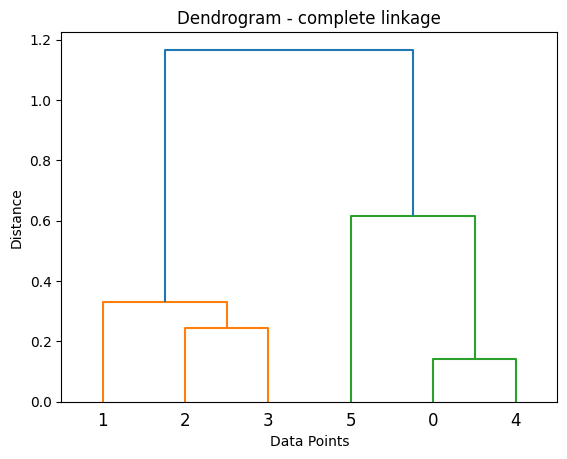

In [80]:
plot_dendrogram(data, 'complete')

In [81]:
true_labels = np.array([0, 0, 1, 1, 2, 2])
predicted_labels = np.array([0, 0, 1, 2, 2, 2])

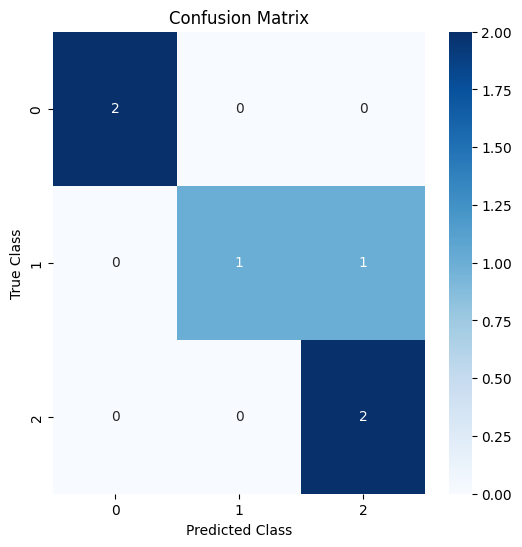

In [82]:
plot_confusion_matrix(true_labels, predicted_labels)

## Program 10

#### PCA 

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [84]:
X = load_iris().data
y = load_iris().target

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

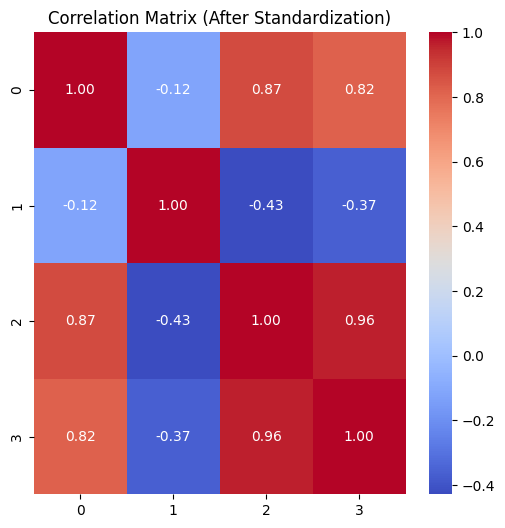

In [86]:
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After Standardization)')
plt.show()

In [87]:
pca = SklearnPCA(n_components=2)
X_projected = pca.fit_transform(X_scaled)

In [88]:
print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


In [89]:
pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

Text(0, 0.5, 'Principal Component 2')

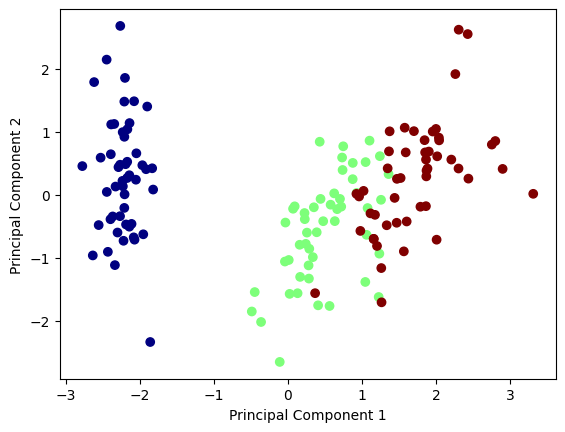

In [90]:
plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#### LDA

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [92]:
X = load_iris().data
y = load_iris().target

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

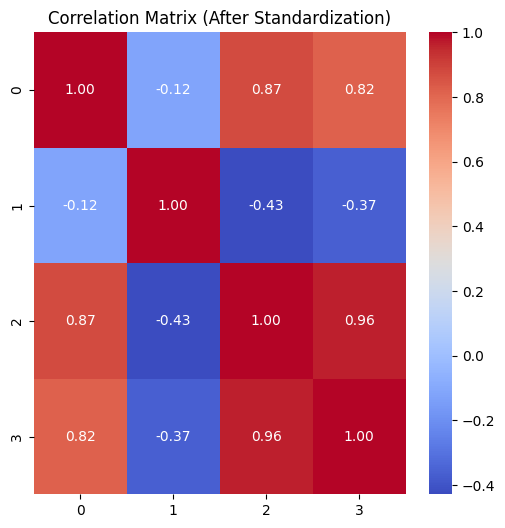

In [94]:
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After Standardization)')
plt.show()

In [95]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_projected = lda.fit_transform(X_scaled, y)

In [96]:
print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


In [97]:
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

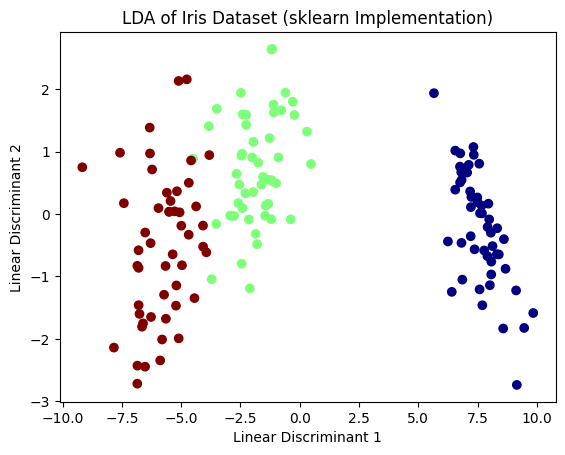

In [98]:
plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset (sklearn Implementation)")
plt.show()

## Program 11

#### Single Layer Perceptron

In [99]:
import numpy as np

In [100]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [101]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

In [102]:
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([[0], [1], [1], [1]])

In [103]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        # Initialize weights to zero
        self.weights = np.zeros((input_size, 1))
        # Initialize bias to zero
        self.bias = 0
        # Set the learning rate and the number of training epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        # Training process
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                # Reshape inputs to column vector
                inputs = inputs.reshape(-1, 1)
                # Calculate linear output
                linear_output = np.dot(inputs.T, self.weights) + self.bias
                # Apply step function to get the prediction
                prediction = step_function(linear_output)
                # Calculate the error
                error = label - prediction
                # Update weights and bias based on the error
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, X):
        # Prediction process
        linear_output = np.dot(X, self.weights) + self.bias
        return step_function(linear_output)

In [104]:
perceptron_and = Perceptron(input_size=2)
perceptron_and.train(X_and, y_and)

In [105]:
perceptron_or = Perceptron(input_size=2)
perceptron_or.train(X_or, y_or)

In [106]:
print("AND Function Predictions:")
print(perceptron_and.predict(X_and))

AND Function Predictions:
[[0]
 [0]
 [0]
 [1]]


In [107]:
print("\nOR Function Predictions:")
print(perceptron_or.predict(X_or))


OR Function Predictions:
[[0]
 [1]
 [1]
 [1]]


In [110]:
and_test_input = np.array([[1, 1]])
print("AND Function Prediction for input [1, 1]:")
print(perceptron_and.predict(and_test_input))

AND Function Prediction for input [1, 1]:
[[1]]


In [111]:
or_test_input = np.array([[0, 1]])
print("OR Function Prediction for input [0, 1]:")
print(perceptron_or.predict(or_test_input))

OR Function Prediction for input [0, 1]:
[[1]]


## Program 12

#### Multi Layer Perceptron

In [112]:
import numpy as np

In [113]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [114]:
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([[0], [0], [1], [0]])

In [115]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

In [116]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights for input to hidden layer
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        
        # Initialize weights for hidden to output layer
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        
        # Initialize biases for hidden layer
        self.bias_hidden = np.random.rand(1, hidden_size)
        
        # Initialize biases for output layer
        self.bias_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the hidden layer
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        
        # Forward pass through the output layer
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, output):
        # Calculate the error for the output layer
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Calculate the error for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights_hidden_output += self.hidden.T.dot(output_delta)
        self.weights_input_hidden += X.T.dot(hidden_delta)
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True)
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

In [117]:
mlp_and_not = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_and_not.train(X_and_not, y_and_not, epochs=5000)

In [118]:
mlp_xor = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_xor.train(X_xor, y_xor, epochs=5000)

In [119]:
print("AND-NOT Function Predictions:")
print(mlp_and_not.predict(X_and_not))

AND-NOT Function Predictions:
[[0]
 [0]
 [1]
 [0]]


In [120]:
print("\nXOR Function Predictions:")
print(mlp_xor.predict(X_xor))


XOR Function Predictions:
[[0]
 [1]
 [1]
 [0]]


In [121]:
and_not_test_input = np.array([[0, 1]])
xor_test_input = np.array([[1, 0]])

In [125]:
print("AND-NOT Function Prediction for input [0, 1]:")
print(mlp_and_not.predict(and_not_test_input))

AND-NOT Function Prediction for input [0, 1]:
[[0]]


In [126]:
print("XOR Function Prediction for input [1, 0]:")
print(mlp_xor.predict(xor_test_input))

XOR Function Prediction for input [1, 0]:
[[1]]
